## Library

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import pacf,acf
import statsmodels

## Membaca Data 

In [16]:
df = pd.read_csv('tute1.csv')

In [17]:
df = df.drop(columns=['AdBudget', 'GDP'])

In [18]:
df.head()

,Unnamed: 0,Sales
0,Mar-81,1020.2
1,Jun-81,889.2
2,Sep-81,795.0
3,Dec-81,1003.9
4,Mar-82,1057.7


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Unnamed: 0    100 non-null object
Sales         100 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [20]:
df.columns = ['date','sales']

In [21]:
year = []
month = []
for i in range(len(df)):
    month.append(df['date'][i].split('-')[0])
    
    if df['date'][i].split('-')[1][:-1] != '0':
        year.append('19'+ df['date'][i].split('-')[1])
    else:
        year.append('20'+ df['date'][i].split('-')[1])

df['date'] = pd.to_datetime(['{}-{}-01'.format(y,m) for y,m in zip(year,month)])

In [22]:
indexedDataset=df.set_index(['date'])

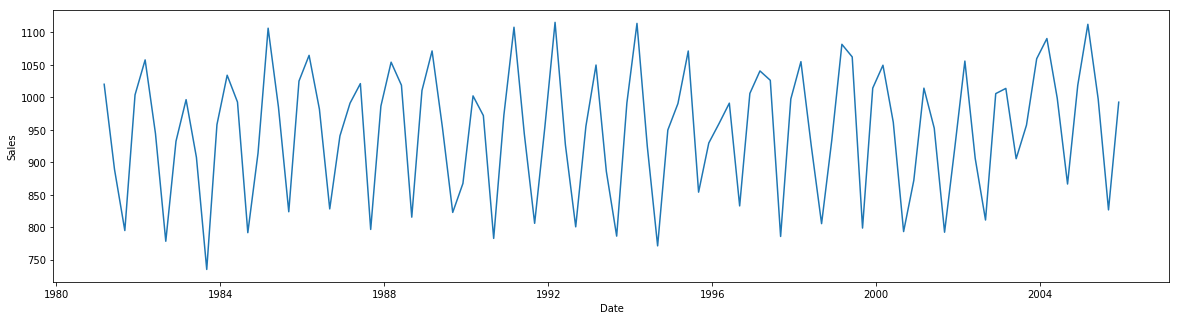

In [23]:
## plot graph
plt.figure(figsize=(20,5))

plt.xlabel("Date")
plt.ylabel("Sales")
plt.plot(indexedDataset)

In [24]:
#Determing rolling statistics
rolmean = indexedDataset.rolling(window=4).mean()

rolstd = indexedDataset.rolling(window=4).std()
print(rolmean, rolstd)

              sales
date               
1981-03-01      NaN
1981-06-01      NaN
1981-09-01      NaN
1981-12-01  927.075
1982-03-01  936.450
...             ...
2004-12-01  993.700
2005-03-01  999.175
2005-06-01  998.800
2005-09-01  988.850
2005-12-01  982.325

[100 rows x 1 columns]                  sales
date                  
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01  105.597771
1982-03-01  117.603472
...                ...
2004-12-01   93.445278
2005-03-01  101.324540
2005-06-01  101.328673
2005-09-01  119.042919
2005-12-01  117.567552

[100 rows x 1 columns]


## Melihat Data

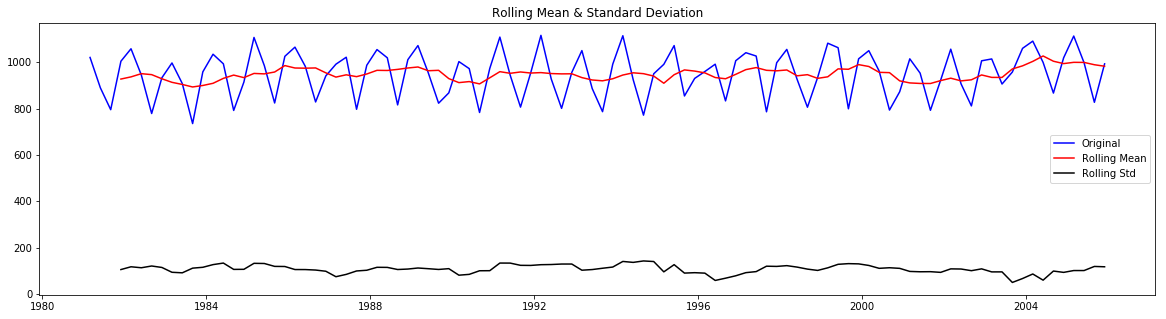

In [25]:
plt.figure(figsize=(20,5))

#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Dapat dilihat dari visualisasi bahwasanya ragam dan rata-ratanya tidak stasioner. Ini menunjukkan bahwasanya perlu dilakukan proses untuk mengolah keduanya.

In [29]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


Dalam pengecekan adfuller, terlihat bahwasanya p-value lebih kecil daripada h0 (0.05) maka data stasioner dalam rataan. Sehingga cukup dilakukan proses pendekatan stasioner kepada rata-rataan data.

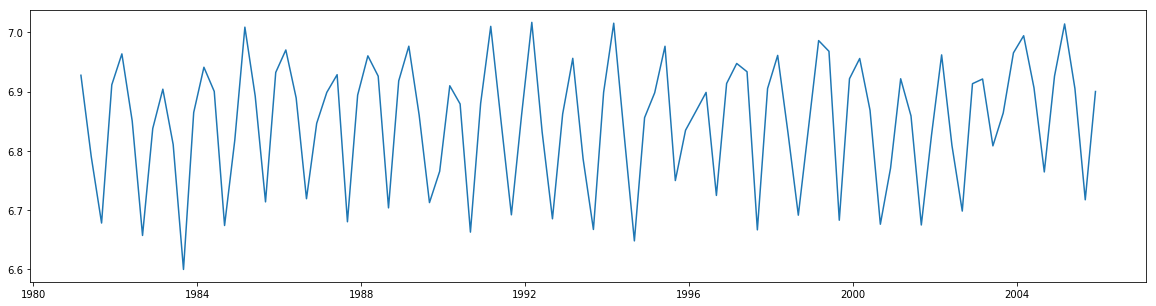

In [30]:
plt.figure(figsize=(20,5))

#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

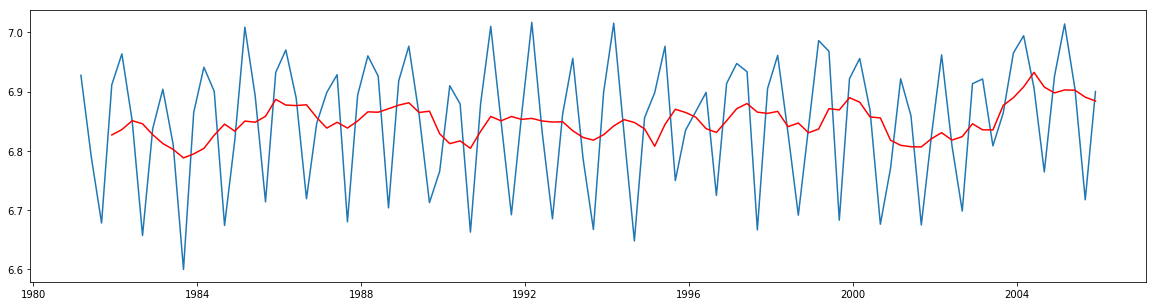

In [31]:
plt.figure(figsize=(20,5))

movingAverage = indexedDataset_logScale.rolling(window=4).mean()
movingSTD = indexedDataset_logScale.rolling(window=4).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [32]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

# Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,sales
date,
1981-12-01,0.084631
1982-03-01,0.127811
1982-06-01,-0.000548
1982-09-01,-0.188486
1982-12-01,0.010459
1983-03-01,0.091740
1983-06-01,0.008314
1983-09-01,-0.188253
1983-12-01,0.069922


In [36]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
  #Determing rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
  
  #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
  
  #Perform Dickey-Fuller test:
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

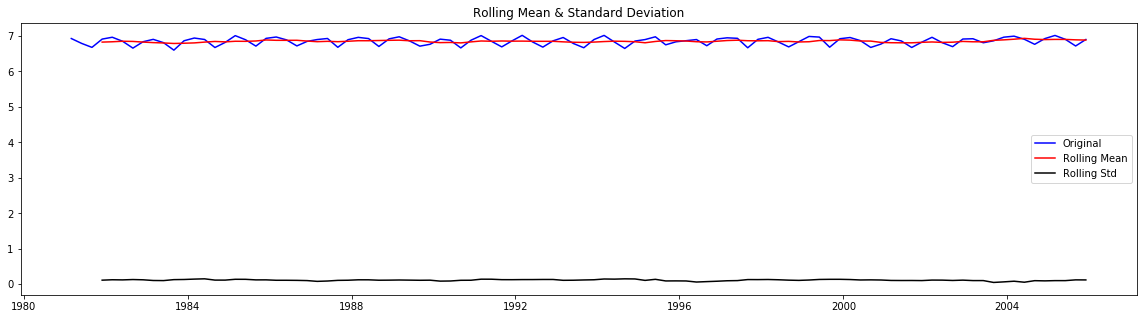

Result of Dickey-Fuller Test:
Test Statistic                 -2.944119
p-value                         0.040453
#Lag Used                       8.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [47]:
plt.figure(figsize=(20,5))

test_stationarity(indexedDataset_logScale)

## PACF dan ACF

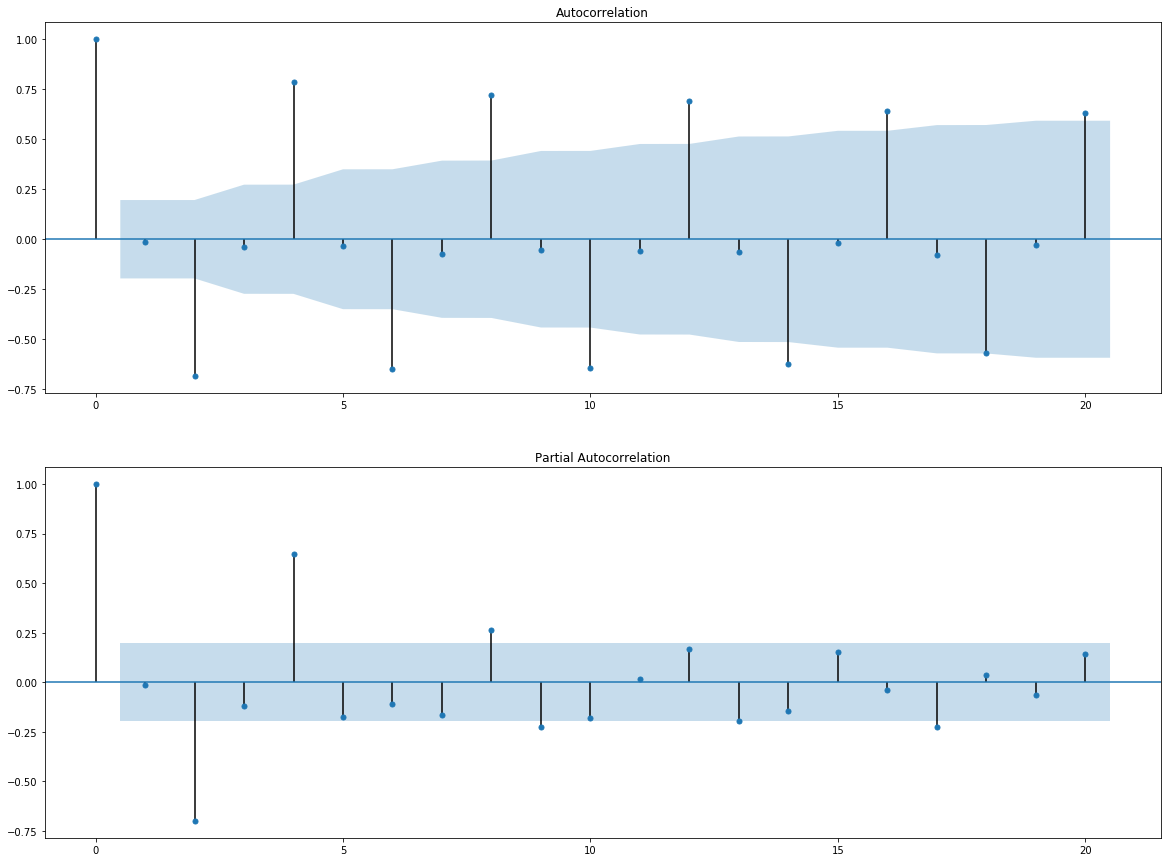

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
plt.figure(figsize=(20,15))
pyplot.subplot(211)
plot_acf(indexedDataset_logScale, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(indexedDataset_logScale, ax=pyplot.gca())
pyplot.show()

In [54]:
from pmdarima import auto_arima

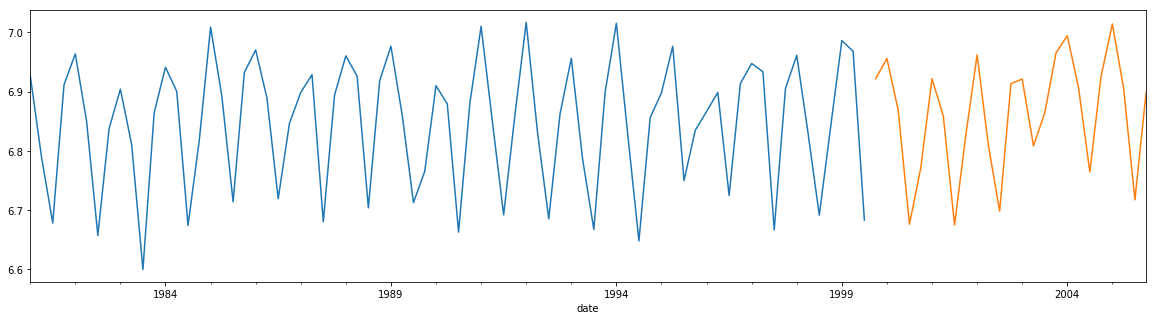

In [55]:
plt.figure(figsize=(20,5))

train = indexedDataset_logScale[:int(0.75*(len(indexedDataset_logScale)))]
valid = indexedDataset_logScale[int(0.75*(len(indexedDataset_logScale))):]

train['sales'].plot()
valid['sales'].plot()

In [57]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-194.462, BIC=-180.557, Fit time=0.416 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-116.452, BIC=-111.817, Fit time=0.032 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-114.563, BIC=-107.611, Fit time=0.044 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-114.638, BIC=-107.686, Fit time=0.032 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-137.906, BIC=-126.318, Fit time=0.624 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=-201.648, BIC=-185.426, Fit time=0.368 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-178.583, BIC=-164.678, Fit time=0.560 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=-200.878, BIC=-182.338, Fit time=0.516 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-127.001, BIC=-115.414, Fit time=0.292 seconds
Fit ARIMA: order=(4, 0, 3) seasonal_o

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(4, 0, 4),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

Melakukan percobaan dari model automasi pada ARIMA. dihasilkan AIC yang terendah (-215.379) menggunakan function auto-arima. Hal ini hanya membantu dalam pencarian order, walaupun pada data aslinya sering mengalami kesalahan pada 

## Modelling

Menggunakan model AR

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Plotting AR model


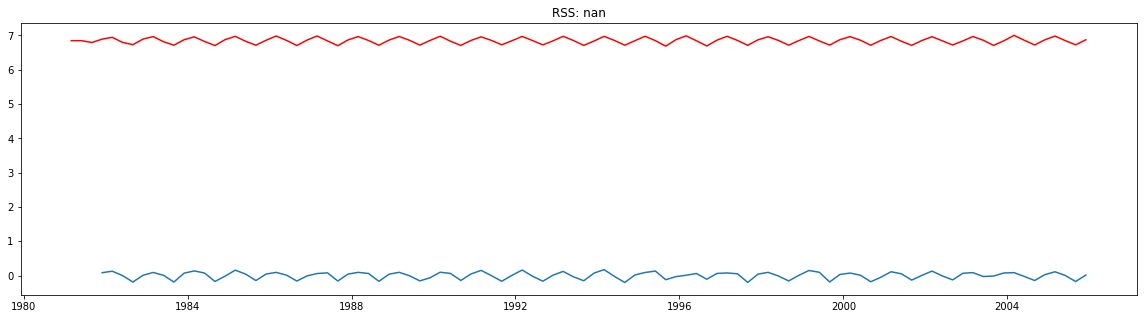

In [69]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,5))

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(4,0,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogScaleMinusMovingAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogScaleMinusMovingAverage["sales"])**2))
print('Plotting AR model')

Menggunakan model MA

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Plotting AR model


C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


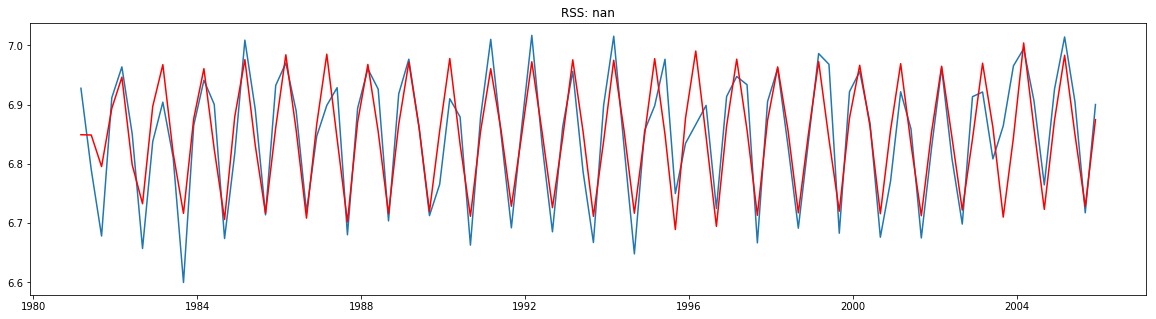

In [74]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,5))

#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(4,0,2))
results_MA = model.fit(disp=-1)
plt.plot(indexedDataset_logScale)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-decomposedLogData["sales"])**2))
print('Plotting AR model')

Menggunakan ARIMA

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5,1,'RSS: nan')

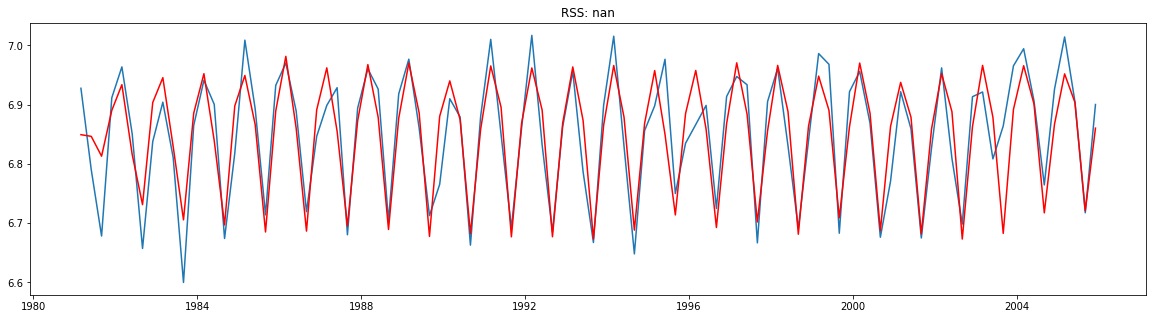

In [76]:
#ARIMA

plt.figure(figsize=(20,5))

model = ARIMA(indexedDataset_logScale, order=(4,0,3))
results_ARIMA = model.fit(disp=-1)
plt.plot(indexedDataset_logScale)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-decomposedLogData["sales"])**2))

In [77]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
1981-03-01    6.849355
1981-06-01    6.848847
1981-09-01    6.795579
1981-12-01    6.893708
1982-03-01    6.946419
dtype: float64


In [78]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
1981-03-01     6.849355
1981-06-01    13.698202
1981-09-01    20.493781
1981-12-01    27.387490
1982-03-01    34.333908
dtype: float64


In [79]:
predictions_ARIMA_log = pd.Series(decomposedLogData['sales'].ix[0], index=decomposedLogData.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
1981-03-01     6.849355
1981-06-01    13.698202
1981-09-01    20.494150
1981-12-01    27.387859
1982-03-01    34.334278
dtype: float64

## Hasil Prediksi

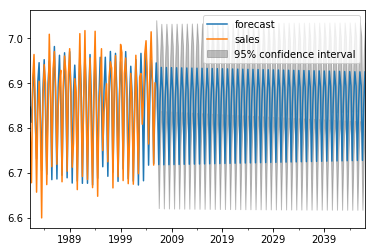

In [81]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps = 120)